# K-means Clustering

In this this exercise, you will implement the K-means algorithm and use it for image compression. You will first start on an example 2D dataset that will help you gain an intuition of how the K-means algorithm works. After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.

The K-means algorithm is a method to automatically cluster similar data examples together. Concretely, you are given a training set {x(1)......x(m)} (where x(i) is an element of Rn), and want to group the data into a few cohesive clusters" The intuition behind K-means is an iterative procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments.

### Implementing K-means
Load an example dataset that we will be using

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io as sio

os.getcwd()
data = sio.loadmat('./data/ex7data2.mat')
X = data['X']

Select an initial set of centroids

In [47]:
K = 3
initial_centroids = [(3, 3), (6, 2), (8, 5)]
X_df = pd.DataFrame(X, columns=['x1','x2'])
K = 3
cluster_names = ['K_' + str(i+1) for i in range(K)]
colors = ['red', 'green', 'blue']
cluster_names_colors = [('K_' + str(i+1), colors[i]) for i in range(K)]
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

Find the closest centroids for the examples using the initial_centroids

In [48]:
def find_closest_centroids(X_df, initial_centroids):
    num_centroids = len(initial_centroids)
    # compute the euclidian distance of each data point from each of the centroids and store it in a column of dataframe
    for i in range(num_centroids):
        col_name = 'K_' + str(i+1)
        X_df[col_name] = ((X_df['x1'] - initial_centroids[i, 0]) ** 2) + ((X_df['x2'] - initial_centroids[i, 1]) ** 2)
    # for each data point ( row in dataframe ) compare the distance from each centroid and assign the data point
    # to centroid with minimum distance
    if 'cluster' in X_df.columns:
        X_df['cluster'] = X_df.iloc[:, 2:-1].idxmin(axis=1)
    else:
        X_df['cluster'] = X_df.iloc[:, 2:].idxmin(axis=1)
    
find_closest_centroids(X_df, initial_centroids)
print('The first three examples belong to the clusters')
print(X_df['cluster'][0:3].values.tolist())

The first three examples belong to the clusters
['K_1', 'K_3', 'K_2']


Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that were
assigned to it.

In [49]:
def compute_centroids(X_df, cluster_names_colors):
    new_centroids = {}
    for cluster_name_color in cluster_names_colors:
        cluster_df = X_df[X_df['cluster'] == cluster_name_color[0]]
        new_centroids[cluster_name_color[0]] = [cluster_df['x1'].mean(), cluster_df['x2'].mean()]
    return new_centroids

new_centroids = compute_centroids(X_df, cluster_names_colors)
print('Location of centroids computed after first iteration:')
print(new_centroids)

Location of centroids computed after first iteration:
{'K_1': [2.4283011120981963, 3.1579241766035673], 'K_2': [5.813503308520713, 2.6336564514030254], 'K_3': [7.1193868715087545, 3.6166843987216186]}


We will now run a number of iteration of k-means and plot the data points belonging to three clusters red, green and blue. We will also plot the centroid of each cluster. Notice how the clustering on points and the centroid locations change with each iteration and iteration 6 onwards the change become negligible

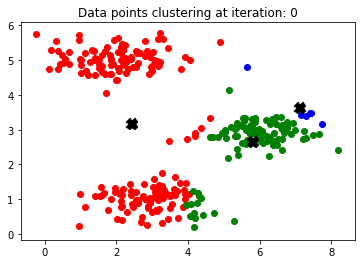

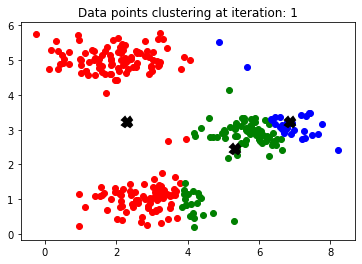

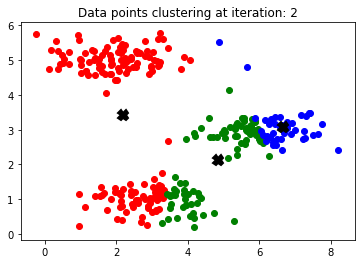

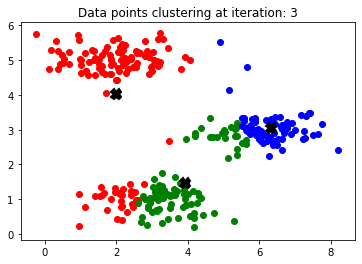

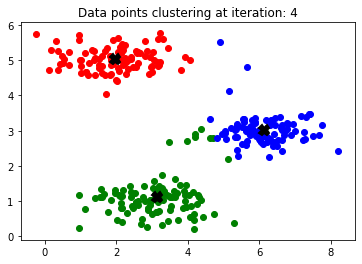

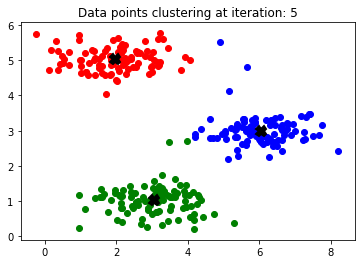

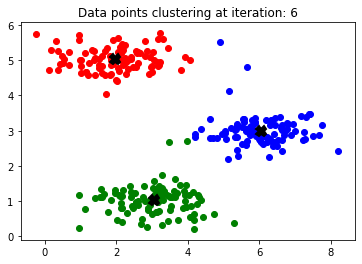

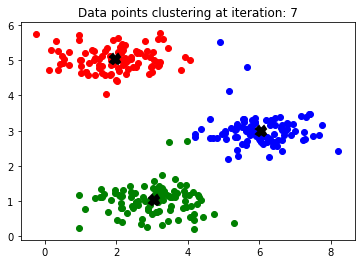

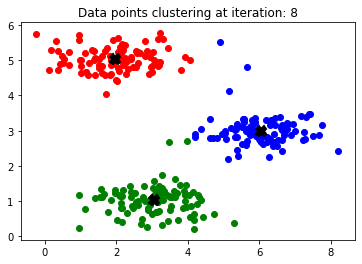

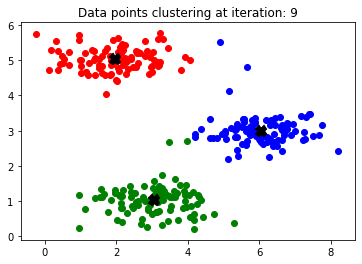

In [52]:
def plot_data(X_df, cluster_names_colors, centroids, iter_count):
    fig, ax = plt.subplots()
    for cluster_name_color in cluster_names_colors:
        cluster_df = X_df[X_df['cluster'] == cluster_name_color[0]]
        ax.scatter(cluster_df['x1'], cluster_df['x2'], marker='o', color=cluster_name_color[1])
        ax.plot(centroids[cluster_name_color[0]][0], centroids[cluster_name_color[0]][1], '-Xk', ms=10, lw=2, mew=2)
    ax.set_title('Data points clustering at iteration: {}'.format(iter_count))
    plt.show()


def run_kmeans(X_df, initial_centroids, num_iterations):
    centroids = initial_centroids
    for iter_count in range(num_iterations):
        find_closest_centroids(X_df, centroids)
        new_centroids = compute_centroids(X_df, cluster_names_colors)
        plot_data(X_df, cluster_names_colors, new_centroids, iter_count)
        centroids = np.array(list(new_centroids.values()))

run_kmeans(X_df, initial_centroids, 10)